# Шаг 1. Загрузка данных

## 1.0 Импорт библиотек 

In [1]:
!pip install shap
!pip install phik
!pip install --upgrade shap

     |████████████████████████████████| 540 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 686 kB 2.6 MB/s eta 0:00:01


In [2]:
# Импорты для работы с данными
import numpy as np
import pandas as pd

# Импорты для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Импорты для работы со статистикой
import scipy.stats as stats
from scipy import sparse as sp
from scipy.stats import shapiro

# Импорты для предобработки данных
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler

# Импорты для построения моделей
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Импорты для оценки моделей
from sklearn.metrics import classification_report, f1_score, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# Импорты для кластеризации
from sklearn.cluster import KMeans

# Импорты для работы с SHAP
import shap

# Импорты для работы с корреляцией
from phik import report
from phik.report import plot_correlation_matrix

## 1.1 Загрузка данных

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

## 1.2 Проверка соответствия данных описанию

### Проверка таблицы market_file

Просматриваем общую информацию о каждой таблице 

In [4]:
display("Информация о таблице market_file:")
market_file.info()
display("\n")
display("Первые 5 строк таблицы market_file:")
display(market_file.head())

'Информация о таблице market_file:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

'\n'

'Первые 5 строк таблицы market_file:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Нужно поменять тип данных в столбах "Маркет_актив_6_мес" и "Акционные_покупки" на float64.

### Проверка таблицы market_money

In [5]:
# Проверка таблицы market_time
display("Информация о таблице market_money:")
market_money.info()
display("\n")
display("Первые 5 строк таблицы market_money:")
display(market_money.head())

'Информация о таблице market_money:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


'\n'

'Первые 5 строк таблицы market_money:'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Нужно поменять тип данных в столбе "Выручка" на float64

### Проверка таблицы market_time

In [6]:
# Проверка таблицы market_time
display("Информация о таблице market_time:")
market_time.info()
display("\n")
display("Первые 5 строк таблицы market_time:")
display(market_time.head())

'Информация о таблице market_time:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


'\n'

'Первые 5 строк таблицы market_time:'

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


### Проверка таблицы money

In [7]:
# Проверка таблицы money
display("Информация о таблице money:")
money.info()
display("\n")
display("Первые 5 строк таблицы money:")
display(money.head())

'Информация о таблице money:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


'\n'

'Первые 5 строк таблицы money:'

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общий этог по разелу: Необходимо выполнить преобразование типа данных для столбца "Выручка" в float64, а также для столбцов "Маркет_актив_6_мес" и "Акционные_покупки", тоже конвертировать их в формат float64.

## Шаг 2. Предобработка данных

### Преобразование столбцов в числовой тип данных

Преобразуем типы данных столбцов 'Маркет_актив_6_мес' и 'Акционные_покупки' в таблице market_file и 'Выручка' в таблице market_money в числовой формат, игнорируя ошибочные значения, а затем выводим обновленную информацию о таблицах.

In [8]:
# Преобразование столбцов в числовой тип данных
market_file['Маркет_актив_6_мес'] = pd.to_numeric(market_file['Маркет_актив_6_мес'], errors='coerce')
market_file['Акционные_покупки'] = pd.to_numeric(market_file['Акционные_покупки'], errors='coerce')
display("Информация о таблице market_file после преобразования типов данных:")
display(market_file.info())

'Информация о таблице market_file после преобразования типов данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

In [9]:
market_money['Выручка'] = pd.to_numeric(market_money['Выручка'], errors='coerce')
# Проверка таблицы market_money после преобразования типов данных
display("Информация о таблице ma)rket_money после преобразования типов данных:")
market_money.info()

'Информация о таблице ma)rket_money после преобразования типов данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### Обработка дубликатов

Посчитаем дубликаты

In [10]:
display("Дубликаты в market_file:")
display(market_file.duplicated().sum())
display("Дубликаты в market_money:")
display(market_money.duplicated().sum())
display("Дубликаты в market_time:")
display(market_time.duplicated().sum())
display("Дубликаты в money:")
display(money.duplicated().sum())

'Дубликаты в market_file:'

0

'Дубликаты в market_money:'

0

'Дубликаты в market_time:'

0

'Дубликаты в money:'

0

In [11]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [12]:
#Для market_file
print("Уникальные значения в market_file:")
categorical_cols = market_file.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_file[col].value_counts())
    print("-"*30)

Уникальные значения в market_file:
Уникальные значения для 'Покупательская активность':
Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64
------------------------------
Уникальные значения для 'Тип сервиса':
стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64
------------------------------
Уникальные значения для 'Разрешить сообщать':
да     962
нет    338
Name: Разрешить сообщать, dtype: int64
------------------------------
Уникальные значения для 'Популярная_категория':
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64
------------------------------


In [13]:
#Для market_money

print("Уникальные значения в market_money:")
categorical_cols = market_money.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_money[col].value_counts())
    print("-"*30)

Уникальные значения в market_money:
Уникальные значения для 'Период':
текущий_месяц          1300
препредыдущий_месяц    1300
предыдущий_месяц       1300
Name: Период, dtype: int64
------------------------------


In [14]:
#Для market_time

print("Уникальные значения в market_time:")
categorical_cols = market_time.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_time[col].value_counts())
    print("-"*30)

Уникальные значения в market_time:
Уникальные значения для 'Период':
предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64
------------------------------


#Для money (нет категориальных признаков)

Мы преобразовали типы данных столбцов 'Маркет_актив_6_мес' и 'Акционные_покупки' в таблице market_file и 'Выручка' в таблице market_money в числовой формат, игнорируя ошибочные значения, а затем выводим обновленную информацию о таблицах. И увидели что количество дубликатов во всех таблицах ровна 0.
Вывод по разделу: Теперь данные готовы к иследованию.

Исключены неявных дубликатов в категориальных признаках

# Шаг 3. Исследовательский анализ данных

Сравним столбец 'Период' в таблицах market_money и market_time

Проведите исследовательский анализ данных из каждой таблицы.

In [15]:
# Имена таблиц берутся непосредственно из названий файлов
table_names = ['market_file', 'market_money', 'market_time', 'money']

# Список таблиц
tables = [market_file, market_money, market_time, money]

# Итерация по таблицам и их названиям
for table, name in zip(tables, table_names):
    print(f"Статистический анализ для таблицы {name}:")
    display(table[table.select_dtypes(include=['float64', 'int64']).columns].describe())

Статистический анализ для таблицы market_file:


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Статистический анализ для таблицы market_money:


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Статистический анализ для таблицы market_time:


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Статистический анализ для таблицы money:


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [16]:
market_money = market_money[market_money['Выручка'] <= 15000]
len(market_money[market_money['Выручка'] > 15000])
market_money.describe()

,id,Выручка
count,3899.000000,3899.00000
mean,215997.658374,4999.57743
std,375.243472,706.99988
min,215348.000000,0.00000
25%,215673.000000,4590.10000
50%,215998.000000,4957.00000
75%,216322.500000,5363.00000
max,216647.000000,7799.40000


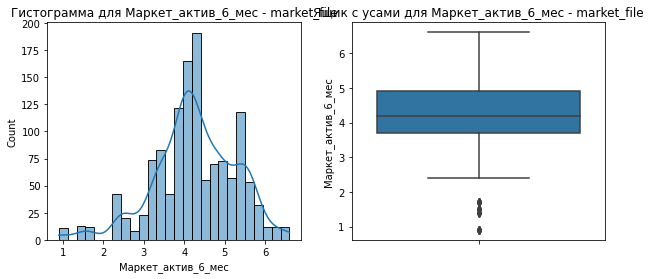

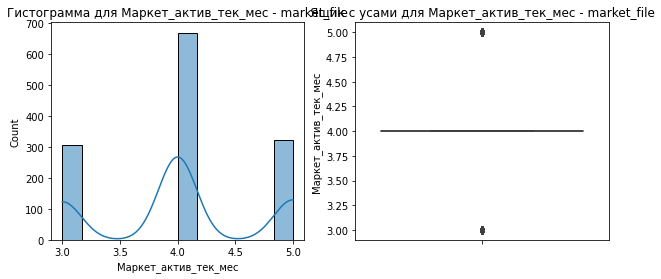

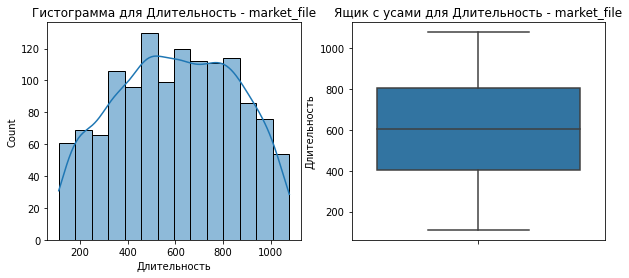

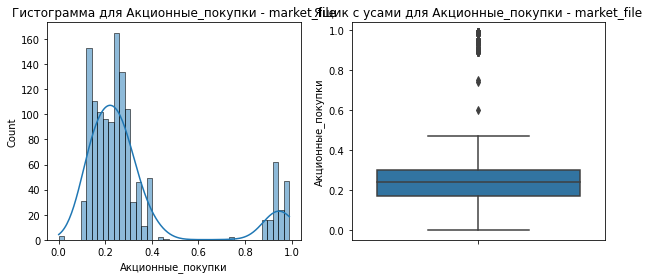

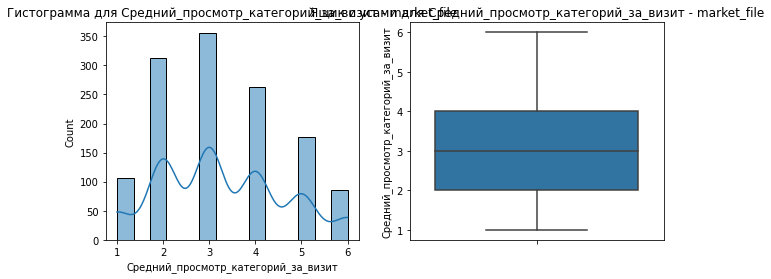

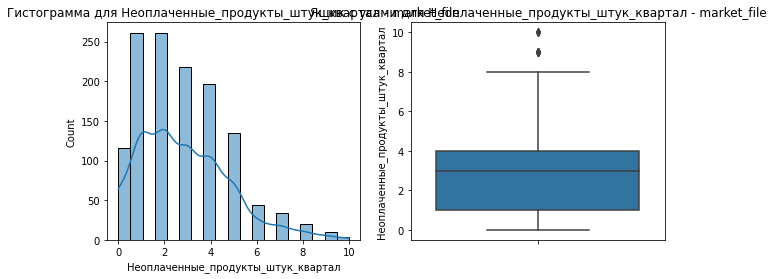

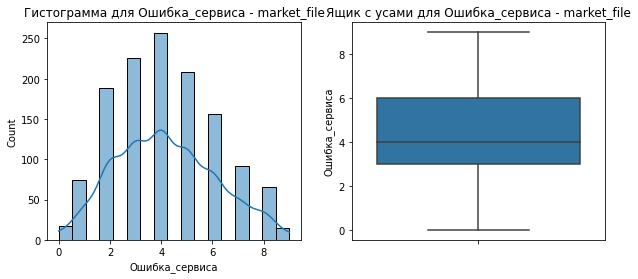

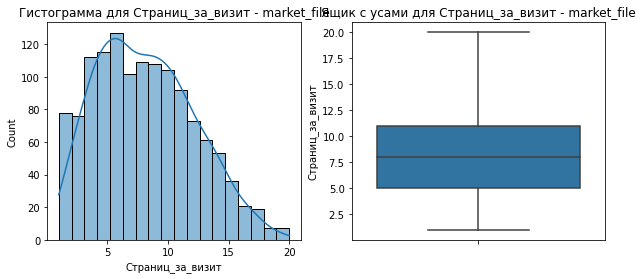

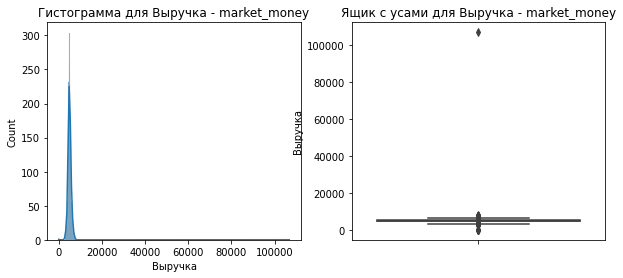

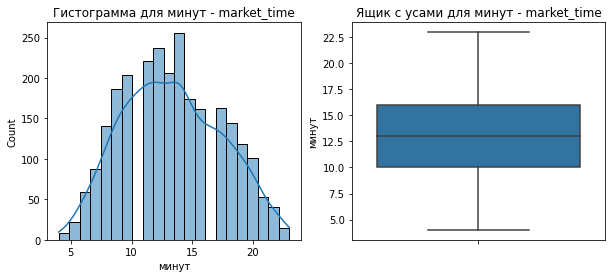

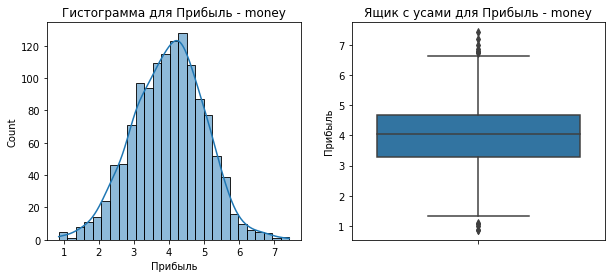

In [17]:
# Создание гистограмм и ящиков с усами для каждой таблицы
for table, name in zip(tables, table_names):
    # Выбор количественных данных из таблицы, исключая ID
    quantitative_data = table.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], errors='ignore')  # предположим, что ID колонка называется 'id'
    
    # Гистограммы для каждого количественного столбца
    for column in quantitative_data:
        plt.figure(figsize=(10, 4))
        
        # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(quantitative_data[column], kde=True)
        plt.title(f'Гистограмма для {column} - {name}')
        
        # Ящик с усами
        plt.subplot(1, 2, 2)
        sns.boxplot(y=quantitative_data[column])
        plt.title(f'Ящик с усами для {column} - {name}')
        
        # Показать графики
        plt.show()

В файле marketfile асимметричные данные в столбце "Акционныепокупки" с медианой в 0,24 и выбросами свыше 0,8. "Неоплаченныепродуктыштукквартал" таже искажены в большую сторону, с максимумом до 10 единиц. В файле marketmoney распределение "Выручки" сильно смещено вправо с экстремально высоким максимумом. Выбросы по выручке были очищены.

In [18]:
market_file['охотник_за_акциями'] = market_file['Акционные_покупки'].apply(lambda x: 'да' if x > 0.8 else 'нет')

/opt/conda/lib/python3.9/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


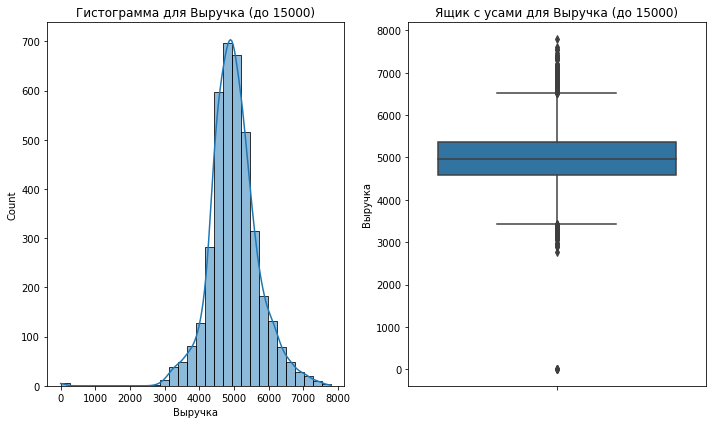

In [19]:
# Ограничить выборку значений до 15000
market_money = market_money[market_money['Выручка'] <= 15000]

# Создать гистограмму
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(market_money['Выручка'], kde=True, bins=30)
plt.title('Гистограмма для Выручка (до 15000)')
plt.xlabel('Выручка')

# Создать ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(y=market_money['Выручка'], orient='h')
plt.title('Ящик с усами для Выручка (до 15000)')

plt.tight_layout()
plt.show()

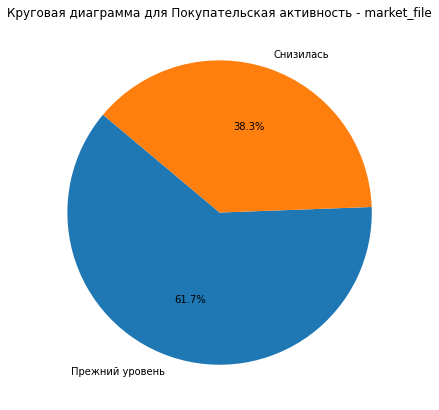

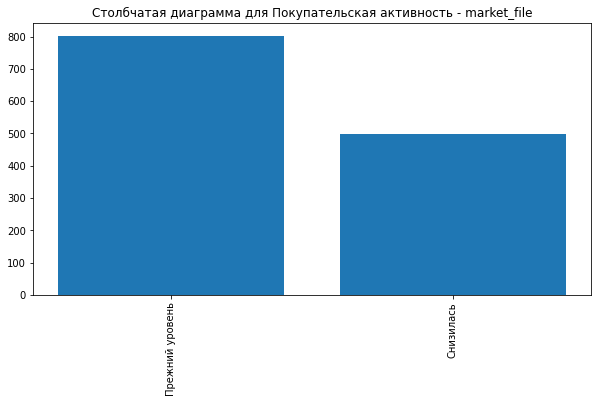

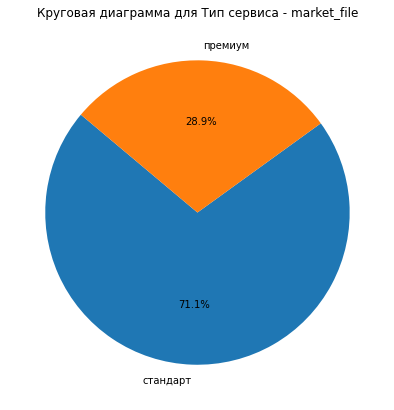

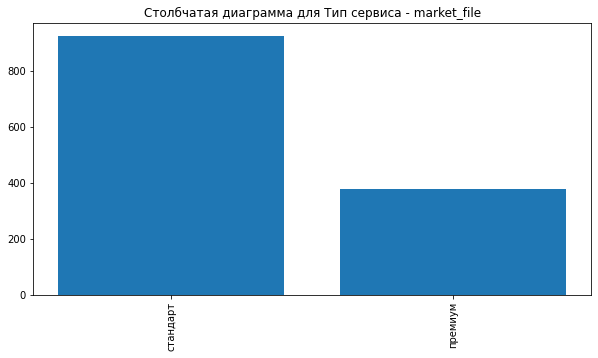

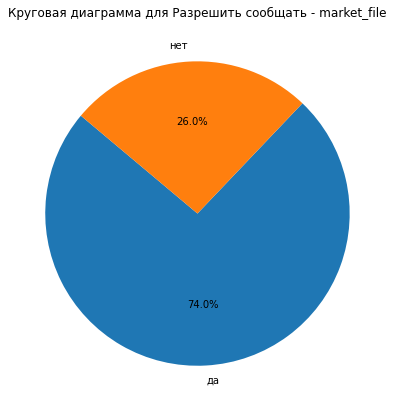

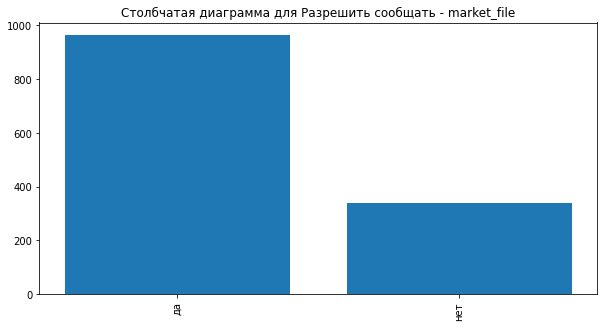

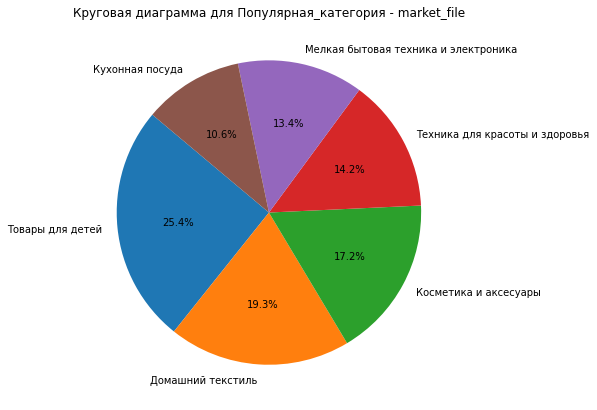

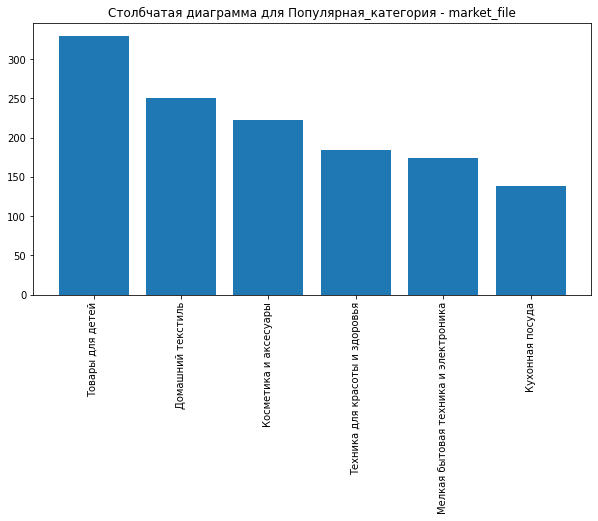

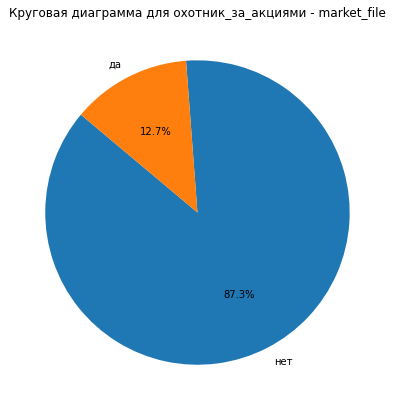

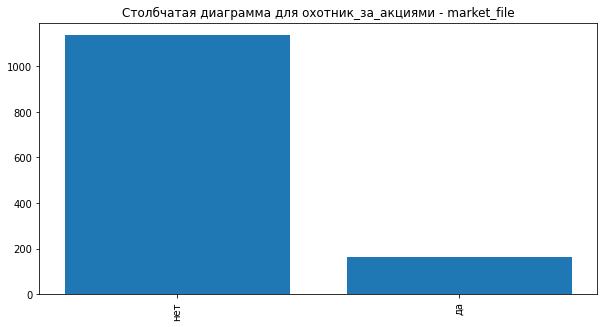

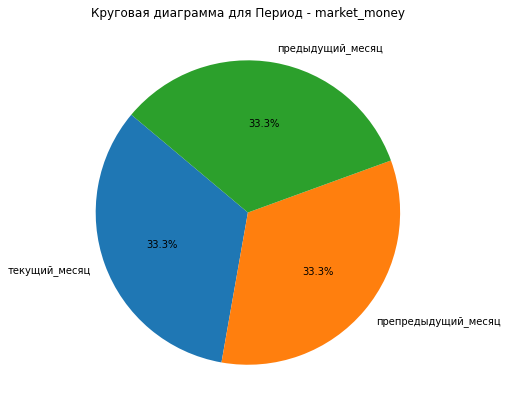

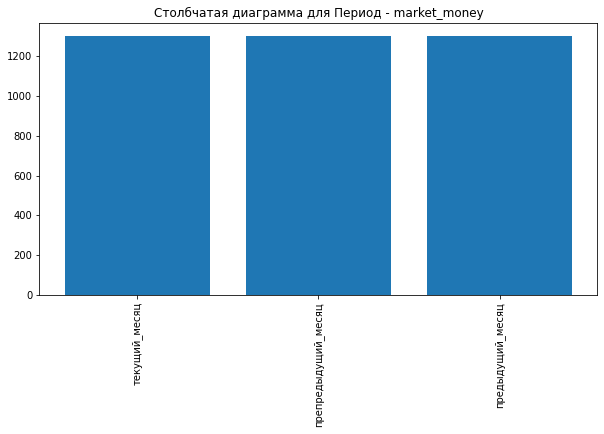

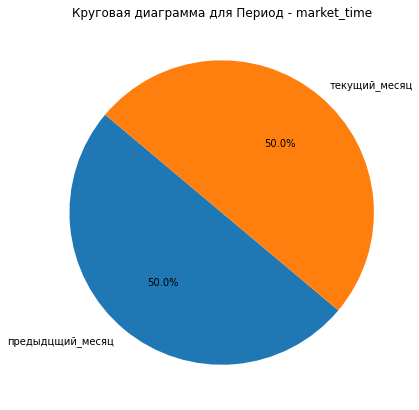

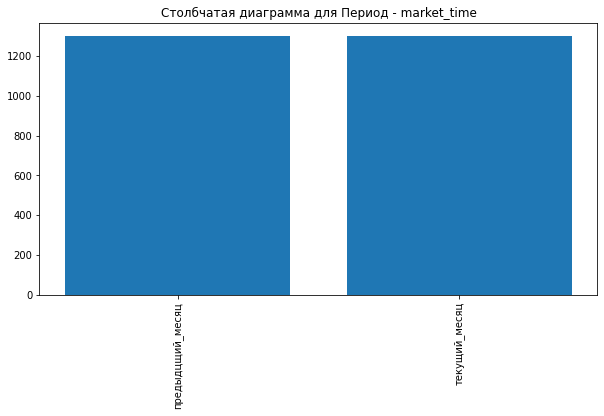

In [20]:
# Для каждой таблицы в списке анализируем категориальные данные
for table, name in zip(tables, table_names):
    # Выбор категориальных данных из таблицы
    categorical_data = table.select_dtypes(include=['object', 'category'])
    
    for column in categorical_data.columns:
        # Считаем количество уникальных значений для категориального столбца
        value_counts = categorical_data[column].value_counts()
        
        # Круговая диаграмма
        plt.figure(figsize=(7, 7))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Круговая диаграмма для {column} - {name}')
        plt.show()
        
        # Столбчатая диаграмма
        plt.figure(figsize=(10, 5))
        plt.bar(value_counts.index, value_counts)
        plt.title(f'Столбчатая диаграмма для {column} - {name}')
        plt.xticks(rotation=90)  # Поворот названий категорий, если они слишком длинные
        plt.show()

Проверка нормальности распределения для Маркет_актив_6_мес в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9779597520828247, p-value=3.3620735319025985e-13
Тест Колмогорова-Смирнова: статистика=0.08138523051217389, p-value=6.145582127667711e-08


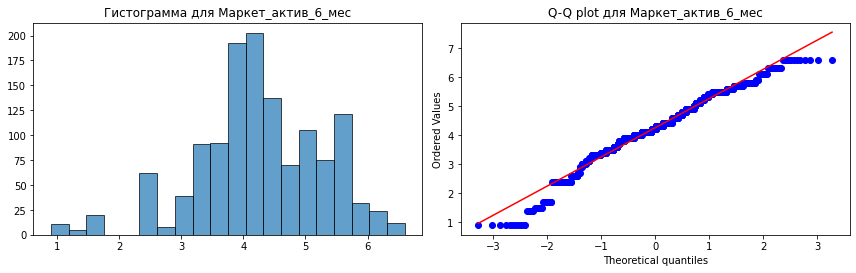

Проверка нормальности распределения для Маркет_актив_тек_мес в таблице market_file:
Тест Шапиро-Уилка: статистика=0.8060010671615601, p-value=7.404956584629319e-37
Тест Колмогорова-Смирнова: статистика=0.25814368620980405, p-value=6.8667300405435566e-77


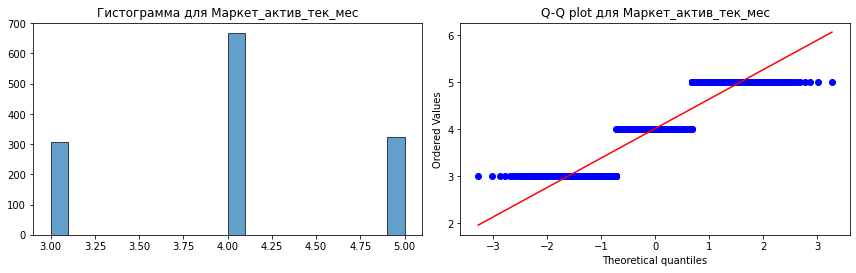

Проверка нормальности распределения для Длительность в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9726996421813965, p-value=5.791480627183451e-15
Тест Колмогорова-Смирнова: статистика=0.04998397055108961, p-value=0.002913117913216906


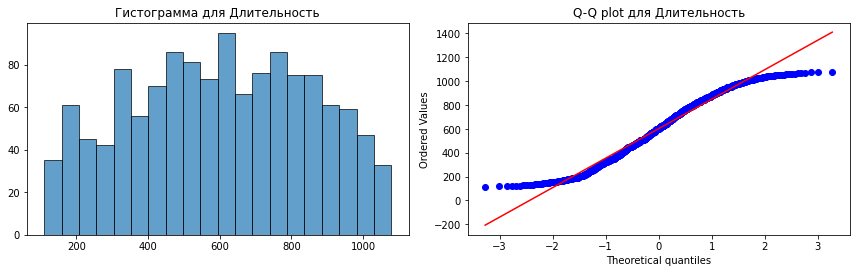

Проверка нормальности распределения для Акционные_покупки в таблице market_file:
Тест Шапиро-Уилка: статистика=0.6621266603469849, p-value=5.605193857299268e-45
Тест Колмогорова-Смирнова: статистика=0.29544140080103337, p-value=4.61696328027541e-101


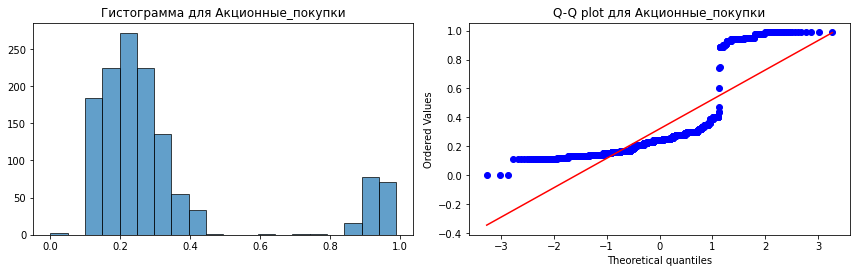

Проверка нормальности распределения для Средний_просмотр_категорий_за_визит в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9306076169013977, p-value=4.3604815072897926e-24
Тест Колмогорова-Смирнова: статистика=0.17433556572129888, p-value=5.032826929516656e-35


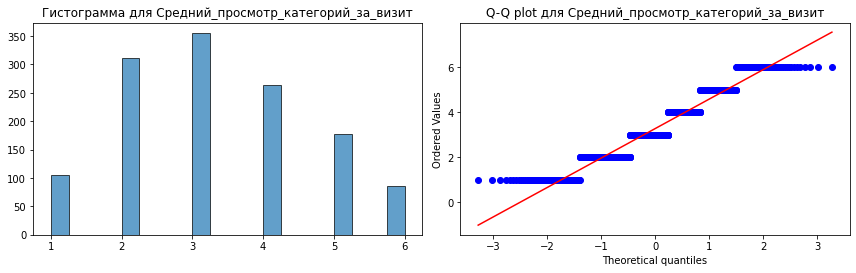

Проверка нормальности распределения для Неоплаченные_продукты_штук_квартал в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9328905940055847, p-value=1.016619879143336e-23
Тест Колмогорова-Смирнова: статистика=0.15574519400157677, p-value=5.261136300532717e-28


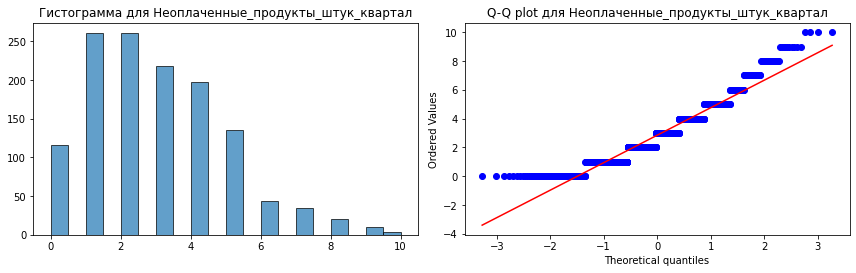

Проверка нормальности распределения для Ошибка_сервиса в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9658770561218262, p-value=6.221483467362438e-17
Тест Колмогорова-Смирнова: статистика=0.1246907832044244, p-value=4.472842170252903e-18


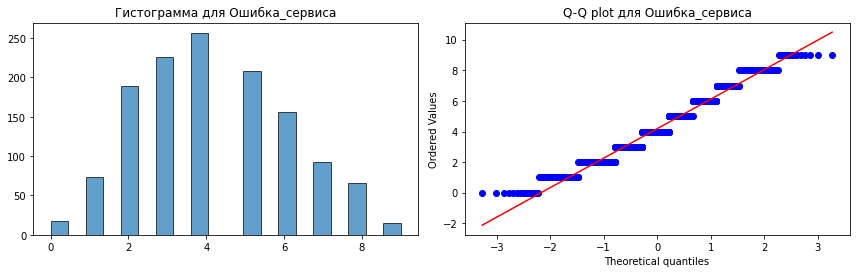

Проверка нормальности распределения для Страниц_за_визит в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9737658500671387, p-value=1.2600152109296277e-14
Тест Колмогорова-Смирнова: статистика=0.09865654813495023, p-value=1.8200166138797855e-11


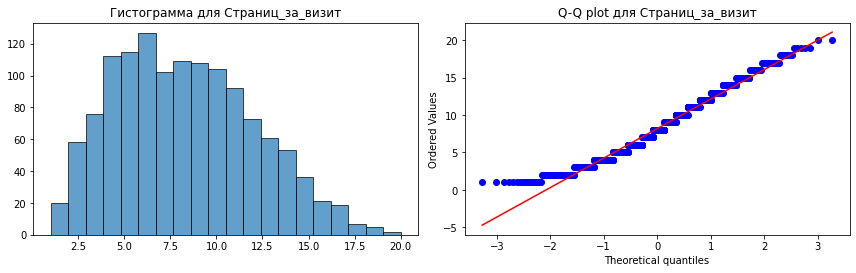

Проверка нормальности распределения для Выручка в таблице market_money:
Тест Шапиро-Уилка: статистика=0.19781219959259033, p-value=0.0
Тест Колмогорова-Смирнова: статистика=0.2375430676265184, p-value=4.217375775526664e-194


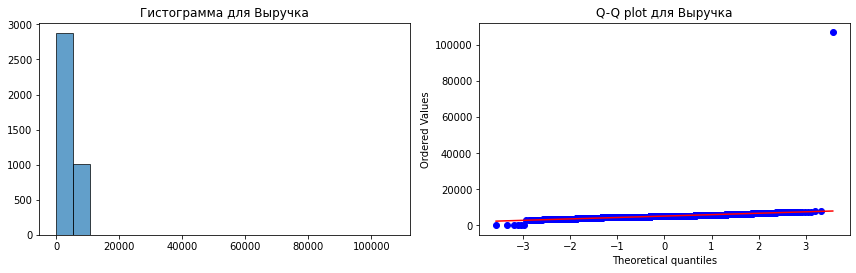

Проверка нормальности распределения для минут в таблице market_time:
Тест Шапиро-Уилка: статистика=0.9825971126556396, p-value=2.538257641794904e-17
Тест Колмогорова-Смирнова: статистика=0.07719098364831062, p-value=6.39395690768915e-14


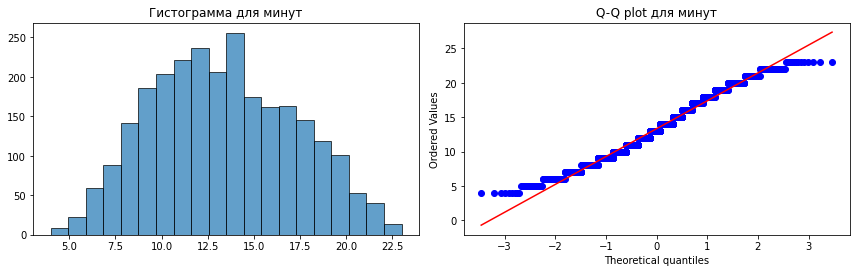

Проверка нормальности распределения для Прибыль в таблице money:
Тест Шапиро-Уилка: статистика=0.9983817934989929, p-value=0.2580398917198181
Тест Колмогорова-Смирнова: статистика=0.02452273296902474, p-value=0.4084233707877136


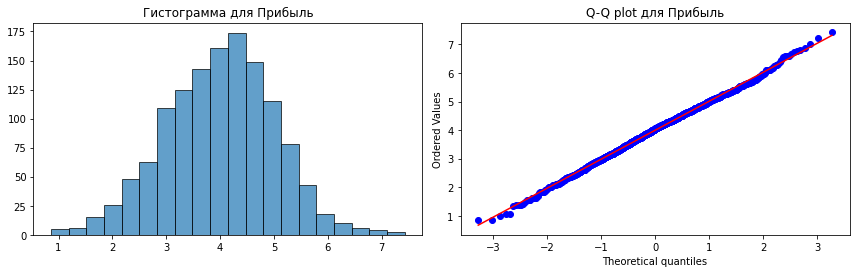

In [21]:
# Перебираем таблицы для анализа количественных данных
for table, name in zip(tables, table_names):
    quantitative_data = table.select_dtypes(include=['float64', 'int64'])
    
    # Исключаем столбец 'id' из анализа
    quantitative_data = quantitative_data.drop(columns=['id'], errors='ignore')
    
    for column in quantitative_data.columns:
        # Печать названия текущего столбца
        print(f"Проверка нормальности распределения для {column} в таблице {name}:")

        # График гистограммы
        plt.figure(figsize=(12, 7))
        plt.subplot(2, 2, 1)
        plt.title(f"Гистограмма для {column}")
        plt.hist(quantitative_data[column], bins=20, edgecolor='k', alpha=0.7)

        # Q-Q plot
        plt.subplot(2, 2, 2)
        stats.probplot(quantitative_data[column].dropna(), dist="norm", plot=plt)
        plt.title(f"Q-Q plot для {column}")

        # Тест Шапиро-Уилка
        shapiro_test = stats.shapiro(quantitative_data[column].dropna())
        # Тест Колмогорова-Смирнова
        ks_test = stats.kstest(quantitative_data[column].dropna(), 'norm', args=(quantitative_data[column].mean(), quantitative_data[column].std()))

        # Вывод результатов тестов на нормальность
        print(f"Тест Шапиро-Уилка: статистика={shapiro_test[0]}, p-value={shapiro_test[1]}")
        print(f"Тест Колмогорова-Смирнова: статистика={ks_test[0]}, p-value={ks_test[1]}")

        # Показать графики
        plt.tight_layout()
        plt.show()

Для большинства признаков p-value в тестах Шапиро-Уилка и Колмогорова-Смирнова очень мало (меньше 0.05), что свидетельствует об отклонении от нормального распределения. Исключением является столбец "Прибыль" в таблице money, где p-value больше 0.05, что указывает на возможность нормального распределения.

In [22]:
display(market_money['Период'].value_counts())
display(market_time['Период'].value_counts())
len(market_money['id'].unique())

препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1299
Name: Период, dtype: int64

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

1300

Найдем количество клиентов с покупательской активностью не менее трёх месяцев

In [23]:
# Показать id из market_money, где Период = 'предыдцщий_месяц'
previous_month_ids = market_money[market_money['Период'] == 'предыдущий_месяц']['id']
display(f"Количество клиентов с покупательской активностью не менее трёх месяцев: {len(previous_month_ids)}")

'Количество клиентов с покупательской активностью не менее трёх месяцев: 1300'

In [24]:
# Преобразуем столбец 'Период' в категориальный тип данных
market_money['Период'] = pd.Categorical(market_money['Период'], categories=['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц'])

# Разбиваем DataFrame по периодам
market_money_by_period = market_money.pivot(index='id', columns='Период', values='Выручка')

# Заполняем пропущенные значения нулями
market_money_by_period = market_money_by_period.fillna(0)

# Создаем маску для пользователей с выручкой хотя бы в одном из трех месяцев
mask = ((market_money_by_period['текущий_месяц'] > 0) & 
        (market_money_by_period['предыдущий_месяц'] > 0) & 
        (market_money_by_period['препредыдущий_месяц'] > 0))

# Получаем id пользователей, удовлетворяющих условию
user_ids_to_keep = market_money_by_period[mask].index

# Выводим количество оставшихся пользователей
print(f"Количество клиентов с покупательской активностью во всех трёх месяцах: {len(user_ids_to_keep)}")
market_money.info()
display(user_ids_to_keep)

Количество клиентов с покупательской активностью во всех трёх месяцах: 1296
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       3899 non-null   int64   
 1   Период   3899 non-null   category
 2   Выручка  3899 non-null   float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 95.3 KB


Int64Index([215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356,
            215358, 215360,
            ...
            216638, 216639, 216640, 216641, 216642, 216643, 216644, 216645,
            216646, 216647],
           dtype='int64', name='id', length=1296)

In [25]:
# Получаем все уникальные id из market_money
all_user_ids = market_money['id'].unique()

# Находим id, которые не вошли в user_ids_to_keep
user_ids_to_remove = np.setdiff1d(all_user_ids, user_ids_to_keep)

# Выводим количество удаленных пользователей
print(f"Количество пользователей, удаленных из-за отсутствия активности: {len(user_ids_to_remove)}")

Количество пользователей, удаленных из-за отсутствия активности: 4


Не потребовалось удалять пользователей, так как у всех были покупки в каждом из трех месяцев.

Найдем длину списка previous month ids, для проверки

In [26]:
# Длина списка previous_time_ids
length_of_previous_time_ids = len(previous_month_ids)

# Вывод длины списка
display(f"Количество элементов в списке previous_time_ids: {length_of_previous_time_ids}")

'Количество элементов в списке previous_time_ids: 1300'

Общий вывод:Количество клиентов с покупательской активностью не менее трёх месяцев: 1300

# Шаг 4. Объединение таблиц

## 4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

Еще раз посмотрим на таблицы которые будем объединять

In [27]:
market_file.info()
market_money.info()
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Посмотрим на количество уникальных значений в столбце "ID" для таблицы market_money и market_time

In [28]:
# Подсчет уникальных значений в столбце "ID" для таблицы market_money
unique_ids_money = market_money['id'].nunique()
display("Количество уникальных значений ID в таблице market_money:", unique_ids_money)

# Подсчет уникальных значений в столбце "ID" для таблицы market_time
unique_ids_time = market_time['id'].nunique()
display("Количество уникальных значений ID в таблице market_time:", unique_ids_time)

'Количество уникальных значений ID в таблице market_money:'

1300

'Количество уникальных значений ID в таблице market_time:'

1300

Обьеденим таблицы market_file и market_money_pivot по индексу 'id'

## 4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [29]:
# Преобразовать столбец 'Период' в строковый тип данных
market_money['Период'] = market_money['Период'].astype(str)

# Преобразовать столбец 'id' в числовой тип данных
market_money['id'] = market_money['id'].astype(int)

# Выполнить pivot
market_money_pivot = market_money.pivot(index='id', columns='Период', values='Выручка').reset_index()
market_money_pivot.columns = ['id'] + [f'{col}_выручка' for col in market_money_pivot.columns[1:]]

market_time_pivot = market_time.pivot(index='id', columns='Период', values='минут').reset_index()
market_time_pivot.columns = ['id'] + [f'{col}_на_сайте' for col in market_time_pivot.columns[1:]]

# Объединение таблиц
merged_data = pd.merge(market_file, market_money_pivot, on='id', how='left')
data = pd.merge(merged_data, market_time_pivot, on='id', how='left')

Взглянем на новую таблицу

In [30]:
display("Информация об объединенной таблице:")
display(data.info())

display("\nПервые 5 строк объединенной таблицы:")
display(data.head())

'Информация об объединенной таблице:'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

'\nПервые 5 строк объединенной таблицы:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11


Необходимо убедиться, что каждый идентификатор из файла market_file присутствует в финальном наборе данных data, а также проверить объединенные данные на отсутствие недостающих значений.

In [31]:
if not market_file['id'].isin(data['id']).all():
    display("Не все id из market_file присутствуют в итоговой таблице data.")
else:
    display("Все id из market_file присутствуют в итоговой таблице data.")

# Проверка на наличие пропущенных значений
if data.isnull().any().any():  # .any().any() возвращает True, если есть хотя бы одно пропущенное значение
    display("В объединенных данных есть пропущенные значения.")
else:
    display("В объединенных данных нет пропущенных значений.")

'Все id из market_file присутствуют в итоговой таблице data.'

'В объединенных данных есть пропущенные значения.'

Заполним пропуск медианой

In [32]:
median_value = data['текущий_месяц_выручка'].median()
data['текущий_месяц_выручка'].fillna(median_value, inplace=True)

In [33]:
data.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
охотник_за_акциями                     0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
предыдцщий_месяц_на_сайте              0
текущий_месяц_на_сайте                 0
dtype: int64

# Шаг 5. Корреляционный анализ

In [34]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

Создаем список имен колонок с числовыми данными

In [35]:
# Выделение количественных признаков

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

Вычислим корреляционной матрицы, для проверки на мультиколлинеарности

In [36]:
interval_cols = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 
                 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
                 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит',
                 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка',
                 'предыдцщий_месяц_на_сайте', 'текущий_месяц_на_сайте']

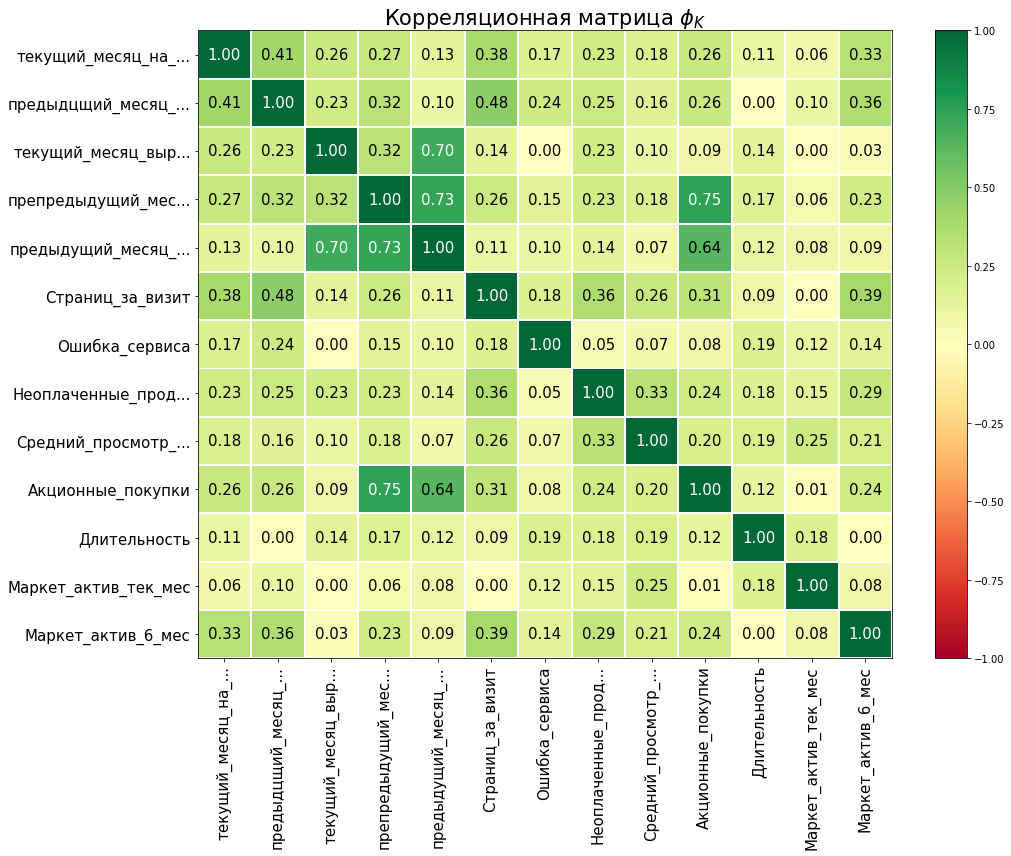

In [37]:
phik_overview = data[interval_cols].phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        title=r"Корреляционная матрица $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(15, 12))

Общий вывод по разделу: Мультиколлинеарность не обнаружена.

# Шаг 6. Использование пайплайнов

## 6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

Определим числовые и категориальные признаки, исключаем целевую переменную 'Покупательская активность', а затем разделяем данные на обучающую и тестовую выборки.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [39]:
data = data.set_index('id')

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()


# Убедиться, что 'Покупательская активность' не включена в списки, так как она является целевой переменной
categorical_cols.remove('Покупательская активность')
categorical_cols.remove('Тип сервиса')

# Разделение данных на признаки и целевую переменную
X = data.drop('Покупательская активность', axis=1)
y = data['Покупательская активность']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

Кастомный трансформер для переключения между скалерами

In [40]:
# Кастомный трансформер для переключения между скалерами
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler_type='standard'):
        self.scaler_type = scaler_type
        if scaler_type == 'standard':
            self.scaler = StandardScaler()
        elif scaler_type == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("Unsupported scaler type")

    def fit(self, X, y=None):
        self.scaler.fit(X, y)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

In [41]:
# Определение препроцессоров
categorical_preprocessor_tree = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories='auto'))
])

categorical_preprocessor_lr_knn = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))
])

# Определение кастомного скалера в рамках препроцессинга
preprocessor_lr_knn_standard = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', categorical_preprocessor_lr_knn, categorical_cols)
])

preprocessor_lr_knn_minmax = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', categorical_preprocessor_lr_knn, categorical_cols)
])

preprocessor_tree_standard = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', categorical_preprocessor_tree, categorical_cols)
])

preprocessor_tree_minmax = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', categorical_preprocessor_tree, categorical_cols),
    ('ord', categorical_preprocessor_tree, ['Тип сервиса'])
])

In [42]:
# Кодирование меток целевой переменной
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Определение моделей и их гиперпараметров
models = [
    ('knn', KNeighborsClassifier(), [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], {'knn__n_neighbors': [3, 5, 7]}),
    ('dt', DecisionTreeClassifier(random_state=42), [preprocessor_tree_standard, preprocessor_tree_minmax], {'dt__max_depth': [3, 5, 7]}),
    ('lr', LogisticRegression(max_iter=1000, random_state=42), [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], {'lr__C': [0.1, 1, 10]}),
    ('svc', SVC(random_state=42, probability=True), [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']})
]

best_model = None
best_score = 0
best_params = None
best_model_name = None

# Обучение моделей и подбор гиперпараметров с использованием GridSearchCV
for name, model, preprocessors, param_grid in models:
    for preprocessor in preprocessors:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            (name, model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train_encoded)

        print(f'Model: {name}')
        print(f'Best parameters: {grid_search.best_params_}')
        print(f'Best F1 score: {grid_search.best_score_:.4f}')

        # Проверка, является ли текущая модель лучшей, и обновление лучшей модели, оценки и параметров
        if grid_search.best_score_ > best_score:
            best_model = grid_search.best_estimator_
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            best_model_name = name

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Model: knn
Best parameters: {'knn__n_neighbors': 7}
Best F1 score: 0.8088


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Model: knn
Best parameters: {'knn__n_neighbors': 7}
Best F1 score: 0.7656
Model: dt
Best parameters: {'dt__max_depth': 5}
Best F1 score: 0.7969
Model: dt
Best parameters: {'dt__max_depth': 5}
Best F1 score: 0.7953
Model: lr
Best parameters: {'lr__C': 0.1}
Best F1 score: 0.8315
Model: lr
Best parameters: {'lr__C': 10}
Best F1 score: 0.8239
Model: svc
Best parameters: {'svc__C': 1, 'svc__kernel': 'rbf'}
Best F1 score: 0.8401
Model: svc
Best parameters: {'svc__C': 1, 'svc__kernel': 'linear'}
Best F1 score: 0.8293


##  6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [43]:
print("Лучшая модель:")
print(best_model)
print(f"Лучший показатель F1: {best_score:.4f}")
print(f"Лучшие параметры: {best_params}")

Лучшая модель:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                  

In [44]:
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test_encoded, y_pred)
print(f"Значение F1-меры на тестовой выборке: {test_f1:.4f}")

Значение F1-меры на тестовой выборке: 0.8649


Значение F1-меры на тестовой выборке составило 0.8649. Это указывает на то, что лучшая модель - SVC с параметрами C=1 и kernel='rbf' - достигла высокой эффективности в предсказании целевой переменной.

Выбор метрики F1 в данном случае обоснован, так как она учитывает как точность, так и полноту модели, что важно для задач классификации с несбалансированными классами. Значение F1-меры 0.8649 свидетельствует о том, что модель хорошо справляется с классификацией покупательской активности, учитывая баланс между правильно предсказанными положительными случаями (точность) и способностью модели находить все положительные случаи (полнота).

Таким образом, лучшая модель SVC с настроенными гиперпараметрами демонстрирует высокую эффективность на тестовой выборке и может быть использована для прогнозирования покупательской активности в реальных условиях.

Определим пайплайны для различных моделей,и функцию для выбора наилучшей модели.

# Шаг 7. Анализ важности признаков


## 7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

  0%|          | 0/100 [00:00<?, ?it/s]

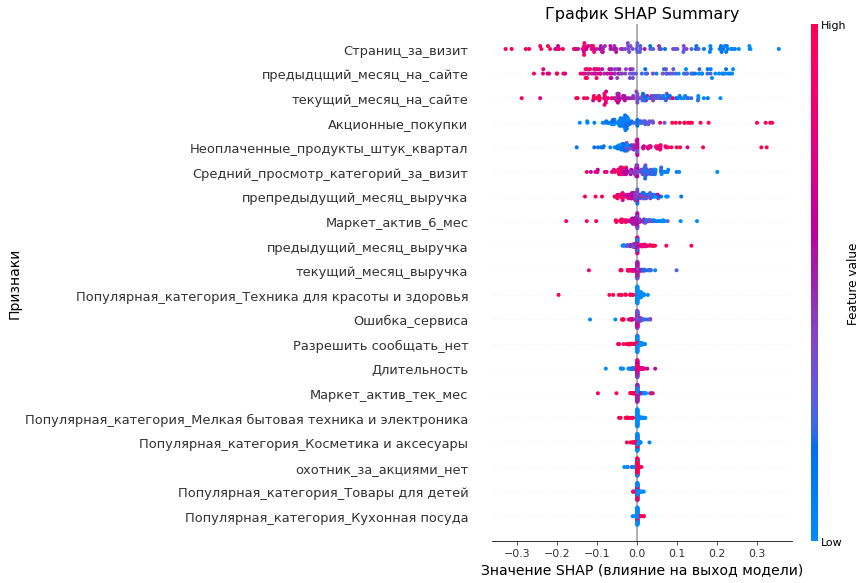

In [45]:
# Обучение лучшей модели на всех тренировочных данных
best_model.fit(X_train, y_train_encoded)

# Препроцессинг тестовых данных
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)

# Объединение числовых и категориальных имен признаков для графика
feature_names = numerical_cols + list(best_model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names(categorical_cols))

# Использование подмножества данных для расчетов SHAP
X_test_sample = shap.sample(X_test_preprocessed, 100, random_state=42)

# Использование SHAP для объяснения предсказаний модели
if best_model_name == 'dt':
    explainer = shap.TreeExplainer(best_model.named_steps[best_model_name])
elif best_model_name in ['lr', 'svc']:
    explainer = shap.KernelExplainer(best_model.named_steps[best_model_name].predict, X_test_sample)
else:
    raise ValueError("Неподдерживаемый тип модели для анализа SHAP")


shap_values = explainer.shap_values(X_test_sample)


# Построение графика важности признаков с увеличенным размером
plt.figure(figsize=(12, 8))  
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_size=(12, 8), show=False)
plt.xlabel('Значение SHAP (влияние на выход модели)', fontsize=14)
plt.ylabel('Признаки', fontsize=14)  
plt.title('График SHAP Summary', fontsize=16) 
plt.show()

По графику SHAP Summary можно сделать вывод, что наиболее влияющими на модель признаками являются: "Страниц_за_визит", "предыдущий_месяц_на_сайте" и "текущий_месяц_на_сайте". Эти признаки имеют наиболее высокие значения SHAP, как положительные, так и отрицательные, что указывает на их существенное влияние на предсказания модели.

Менее значимыми признаками, согласно графику, являются: "охотник_за_акциями_нет", "Популярная_категория_Товары для детей", "Популярная_категория_Мелкая бытовая техника и электроника" и "Маркет_актив_тек_мес". Они имеют относительно низкие значения SHAP и, следовательно, меньшее влияние на результаты модели.

##  7.2 Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

Выводы о значимости признаков на основе анализа графика SHAP:

Наиболее значимые признаки:

"текущий_месяц_выручка" имеет самое высокое положительное влияние на целевой признак.
"Страниц_за_визит" и "Акционные_покупки" также сильно и положительно влияют на целевой признак.
"Маркет_актив_6_мес" и "предыдущий_месяц_на_сайте" оказывают значительное положительное влияние.
Мало значимые признаки:

"предыдущий_месяц_выручка", "Ошибка_сервиса", "Длительность" и некоторые другие имеют относительно низкие абсолютные значения SHAP, указывая на их меньшую значимость.
Использование этих наблюдений:

Сосредоточиться на наиболее значимых признаках при оптимизации модели и сборе данных.
Рассмотреть возможность исключения мало значимых признаков для упрощения модели.
Использовать понимание влияния признаков для интерпретации результатов и принятия бизнес-решений.
Анализ SHAP дает ценную информацию для улучшения модели и принятия обоснованных решений на основе данных.

# Шаг 8. Сегментация покупателей

## 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Добавить предсказанные классы покупательской активности к исходным данным:

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [47]:
# Замена NaN значений на средние (или другим методом)
X_test_clean = X_test.fillna(X.mean())  # Используй средние значения, рассчитанные на обучающем наборе данных
# Замена бесконечных значений на максимальное или минимальное значение для float64
X_test_clean = X_test_clean.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Теперь ты можешь сделать предсказание вероятности без ошибок
y_pred_proba = best_model.predict_proba(X_test_clean)

In [48]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [49]:
# Сбросим индексы для X_test
X_test = X_test.reset_index(drop=True)

# Убедимся, что данные в X_test_clean подготовлены корректно
# предполагая, что X изначально имеет те же столбцы и структуру, что и X_train
X_test_clean = X_test.fillna(X_train.mean())

# Заменим бесконечные значения на максимальные значения
X_test_clean.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


# Теперь создадим столбец с вероятностью ухода клиента
y_test_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]

# Добавим этот столбец к X_test
X_test['churn_probability'] = y_test_pred_proba

# Теперь объединим X_test и money
X_test_with_money = X_test.join(money, how='left')


## 8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.

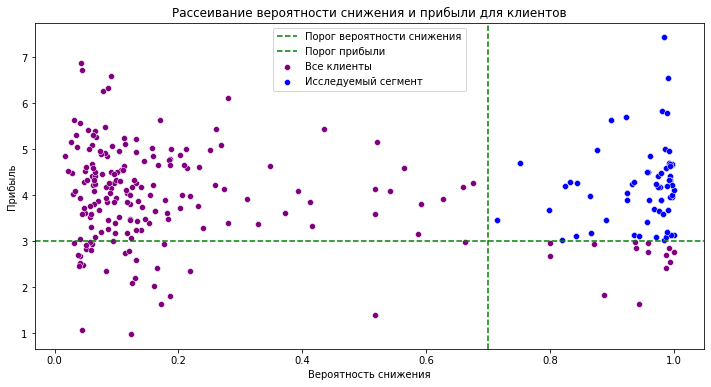

In [50]:
# Выделение сегмента по заданным порогам
threshold_churn_prob = 0.7
threshold_profit = 3

# Отображение рассеивания для сегмента и других клиентов
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X_test_with_money, x='churn_probability', y='Прибыль', label='Все клиенты', color='purple')
sns.scatterplot(data=X_test_with_money[(X_test_with_money['churn_probability'] > threshold_churn_prob) & (X_test_with_money['Прибыль'] > threshold_profit)], 
                x='churn_probability', y='Прибыль', label='Исследуемый сегмент', color='blue')

# Добавление вертикальной и горизонтальной линии для пороговых значений
plt.axvline(x=threshold_churn_prob, color='green', linestyle='--', label='Порог вероятности снижения')
plt.axhline(y=threshold_profit, color='green', linestyle='--', label='Порог прибыли')

plt.legend()
plt.xlabel('Вероятность снижения')
plt.ylabel('Прибыль')
plt.title('Рассеивание вероятности снижения и прибыли для клиентов')
plt.show()

Рассчитать прибыльность каждого покупателя на основе доступных данных о выручке. Например, если есть данные о выручке за текущий, предыдущий и препредыдущий месяцы, можно рассчитать среднюю выручку на покупателя

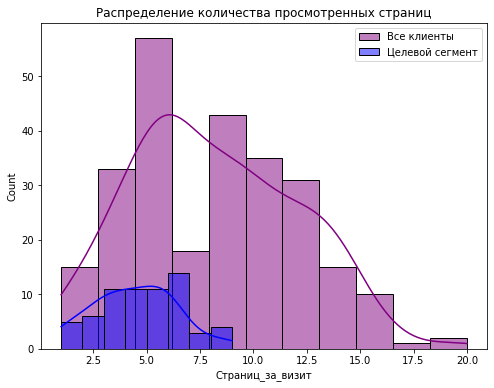

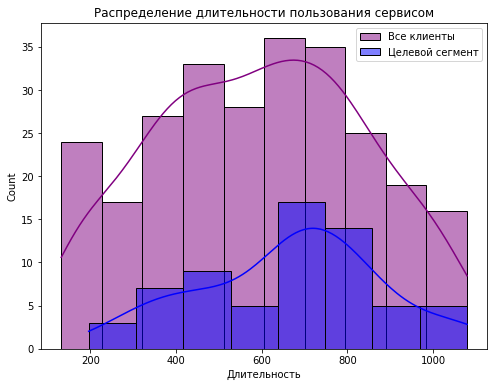

In [51]:
# Выделение целевого сегмента
target_segment = X_test_with_money[(X_test_with_money['churn_probability'] > threshold_churn_prob) & 
                                    (X_test_with_money['Прибыль'] > threshold_profit)]

# Анализ целевого сегмента по количеству просмотренных страниц
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Страниц_за_визит', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Страниц_за_визит', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества просмотренных страниц')
plt.show()

# Анализ целевого сегмента по длительности пользования сервисом
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Длительность', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Длительность', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение длительности пользования сервисом')
plt.show()

# Далее можно провести аналогичный анализ по другим признакам, таким как:
# 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит' и т.д.

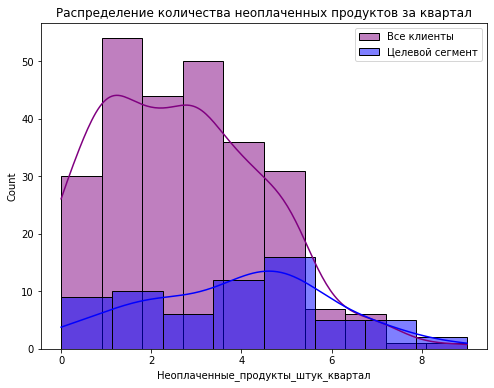

In [52]:
# Анализ целевого сегмента по количеству неоплаченных продуктов за квартал
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Неоплаченные_продукты_штук_квартал', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Неоплаченные_продукты_штук_квартал', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества неоплаченных продуктов за квартал')
plt.show()

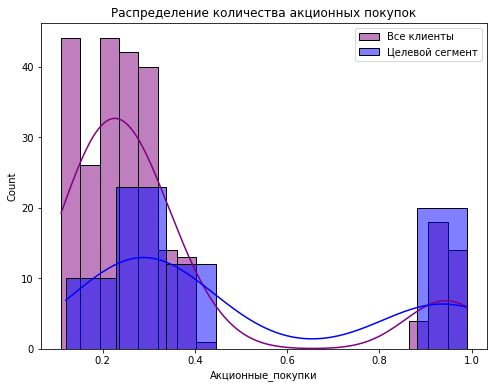

In [53]:
# Анализ целевого сегмента по количеству акционных покупок
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Акционные_покупки', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Акционные_покупки', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества акционных покупок')
plt.show()

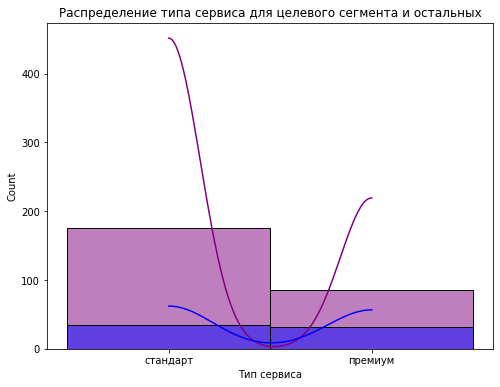

In [54]:
# Построим счетный график для типа сервиса
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Тип сервиса', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Тип сервиса', color='blue', label='Целевой сегмент', kde=True)
plt.title('Распределение типа сервиса для целевого сегмента и остальных')
plt.show()

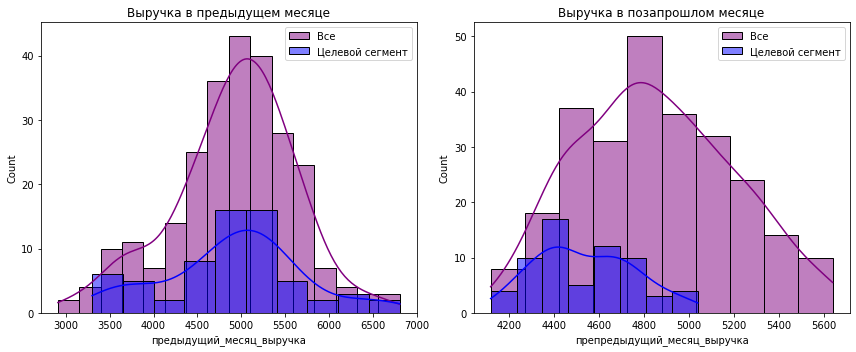

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_test_with_money, x='предыдущий_месяц_выручка', color='purple', label='Все', kde=True)
sns.histplot(data=target_segment, x='предыдущий_месяц_выручка', color='blue', label='Целевой сегмент', kde=True)
plt.title('Выручка в предыдущем месяце')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data=X_test_with_money, x='препредыдущий_месяц_выручка', color='purple', label='Все', kde=True)
sns.histplot(data=target_segment, x='препредыдущий_месяц_выручка', color='blue', label='Целевой сегмент', kde=True)
plt.title('Выручка в позапрошлом месяце')
plt.legend()
plt.tight_layout()
plt.show()

На основе кода мы выделили целевой сегмент клиентов с высокой вероятностью ухода (более 0,7) и высокой прибылью (более 3) для дополнительного анализа и разработки мер по повышению их покупательской активности.
Вывод: 

Для увеличения покупательской активности целевого сегмента клиентов с высокой прибыльностью предлагается персонализировать продукты, услуги, маркетинговые кампании и уведомления под их предпочтения, повысить вовлеченность за счет персонализированного контента и улучшения юзабилити, а также обеспечить высокий уровень обслуживания и удовлетворение их потребностей.

## 8.3 Сделайте выводы о сегментах: какой сегмент вы взяли для дополнительного исследования, какие предложения вы сделали и почему.

На основе кода мы выделили целевой сегмент клиентов с высокой вероятностью ухода (более 0,7) и высокой прибылью (более 3) для дополнительного анализа и разработки мер по повышению их покупательской активности.
Рекомендаций по удержанию целевого сегмента клиентов:
Персонализировать продукты, услуги и маркетинговые кампании под предпочтения ценного сегмента в отношении типов сервисов и популярных категорий.

Усовершенствовать систему персонализированных уведомлений и акционных предложений, учитывая высокую долю "охотников за акциями" в целевом сегменте.

Повысить вовлеченность целевого сегмента путем предоставления персонализированного контента и улучшения юзабилити сайта.

Поддерживать высокое качество обслуживания и регулярно обновлять функциональность сервиса для удовлетворения потребностей долгосрочных клиентов из ценного сегмента.

Проанализировать причины неоплаченных покупок и оптимизировать процесс покупки для сокращения их количества у целевых клиентов.

Фокусироваться на удержании целевого сегмента ввиду их высокой финансовой ценности для компании по показателям выручки.

Вывод: В целом, ключевыми направлениями являются персонализация взаимодействия, адаптация предложения под нужды ценного сегмента и повышение вовлеченности для максимального удовлетворения их потребностей.

# Шаг 9. Общий вывод

- Выполнена загрузка данных, в разделе "Предобработка данных" мы преобразовали типы данных столбцов 'Маркет_актив_6_мес', 'Акционные_покупки' в market_file и 'Выручка' в market_money в числовой формат, проверили отсутствие дубликатов и исследовали данные перед объединением таблиц. Убрали выбросы.
- Затем мы объединили таблицы market_file, market_money и market_time в единый набор данных data, при этом преобразовав столбцы с выручкой и временем на сайте в разделенные по периодам столбцы. Убедились в отсутствии пропущенных значений и потерянных идентификаторов в результирующих данных. Столбец 'id' перенесен в индекс для дальнейшего использования при сегментации.
- Мультиколлинеарность в данных отсутствует. Применили ColumnTransformer для обработки данных: использовали два кодировщика для категорий и два скейлера для количественных признаков. Обучили классификаторы KNeighbors, DecisionTree, LogisticRegression и SVC, оценили по гиперпараметрам. Выбрана метрика F1-weighted;
- Лучшие результаты достигнуты с моделью SVC, где параметр C равен 1, а используемое ядро - 'rbf'. Значение F1-меры составляет 0.8649. Это означает, что данная модель обеспечивает высокое качество предсказаний и может быть эффективным инструментом для анализа данных и прогнозирования покупательской активности в данном контексте.Выбранная метрика F1 учитывает как точность, так и полноту модели, что особенно важно при работе с несбалансированными классами. Значение F1-меры 0.8649 свидетельствует о том, что модель хорошо справляется с классификацией покупательской активности, находя баланс между правильно предсказанными положительными случаями (точность) и способностью модели обнаруживать все положительные случаи (полнота). Таким образом, модель SVC с настроенными гиперпараметрами C=1 и kernel='rbf' демонстрирует высокую эффективность на тестовой выборке и может быть рекомендована для использования в реальных условиях для прогнозирования покупательской активности..
- По графику SHAP Summary можно сделать вывод, что наиболее влияющими на модель признаками являются: "Страниц_за_визит", "предыдущий_месяц_на_сайте" и "текущий_месяц_на_сайте". Эти признаки имеют наиболее высокие значения SHAP, как положительные, так и отрицательные, что указывает на их существенное влияние на предсказания модели. Менее значимыми признаками, согласно графику, являются: "охотник_за_акциями_нет", "Популярная_категория_Товары для детей", "Популярная_категория_Мелкая бытовая техника и электроника" и "Маркет_актив_тек_мес". Они имеют относительно низкие значения SHAP и, следовательно, меньшее влияние на результаты модели.
- Для укрепления позиций на рынке и повышения лояльности целевого сегмента целесообразно:Проанализировать отзывы клиентов для оптимизации продуктов и услуг под их конкретные запросы.Непрерывно повышать качество обслуживания, уделяя внимание персонализации взаимодействия с клиентами. Сфокусироваться на глубоком понимании потребностей ценных клиентов через опросы для последующего усовершенствования сервиса.Минимизировать случаи неоплаты, выявив и устранив барьеры в процессе покупки.Эти шаги способствуют повышению активности целевой группы и обеспечивают рост прибыльности компании.